# ShakeMe: Key Generation Based on Accelerometer Signals Obtained From Synchronous Sensor Motion

In [1]:
%matplotlib inline
from scipy.io import loadmat
from scipy import signal
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Latex
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = (10*1.2, 6*1.2)

## Load accelerometer data set

In this work, two Samsung Galaxy Nexus smart-phones are used to acquire accelerometer sensor data. The data are acquired from linear_acceleration sensor, which is a software-based sensor, of Android API. The sampling rate $F_s$ of the sensor is $100$Hz.

The positive class test data $D_1$ consists of $150$ shaking experiments recorded from $10$ individuals ($15$ experiments per individual). Five of the test subjects are male and five of them are female. All test subjects are asked to shake two devices ($1$ and $2$) together in one hand for $5$ seconds which results in approximately $500$ time samples in an acceleration signal. Except this, no other instructions are given to the individuals. For negative class test data $D_2$, in turn, $300$ test samples are randomly generated from $D_1$ such that first two random individuals are selected out of $10$ individuals and then two acceleration signals of those two individuals are randomly selected. This pair of signals constitutes one negative test sample of $D_2$. 

In [2]:
datasets = loadmat('ShakeMe.mat')['ShakeMe']
datasets

array([[array([[ 5.81306348e+13, -1.69318905e+01, -1.24267082e+01,
        -3.29315178e-02],
       [ 5.81306447e+13, -1.44012527e+01, -1.46136608e+01,
         9.22531605e-01],
       [ 5.81306547e+13, -1.15992289e+01, -1.44759474e+01,
         1.21382582e+00],
       ...,
       [ 5.81356016e+13, -3.23222852e+00, -1.20515890e+01,
         4.26313490e-01],
       [ 5.81356116e+13, -2.60428429e+00, -1.13029957e+01,
        -7.75387585e-02],
       [ 5.81356215e+13, -1.18957627e+00, -1.02758312e+01,
        -7.42456079e-01]]),
        array([[ 4.13253652e+13, -1.36264639e+01, -1.40205936e+01,
        -5.43085670e+00],
       [ 4.13253752e+13, -1.19722538e+01, -1.45585756e+01,
        -4.41147614e+00],
       [ 4.13253852e+13, -8.70499802e+00, -1.49341440e+01,
        -2.85501289e+00],
       ...,
       [ 4.13303290e+13, -1.71722901e+00, -1.20619173e+01,
        -9.89143074e-01],
       [ 4.13303390e+13, -1.83069301e+00, -1.12037516e+01,
        -1.78174484e+00],
       [ 4.13303490e+13

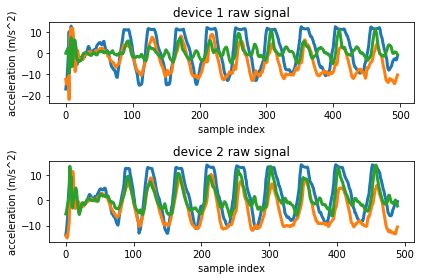

In [66]:
fig, ax = plt.subplots(2,1)
ax[0].plot(datasets[0,0][:,1:])
ax[0].set_title('device 1 raw signal')
ax[0].set_xlabel('sample index')
ax[0].set_ylabel('acceleration (m/s^2)')

ax[1].plot(datasets[0,1][:,1:])
ax[1].set_title('device 2 raw signal')
ax[1].set_xlabel('sample index')
ax[1].set_ylabel('acceleration (m/s^2)')
fig.tight_layout()

In [3]:
labels = np.concatenate(datasets[:,-1])
labels = labels.flatten()
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
# convert data to dataframe
df_datasets = pd.DataFrame(datasets[:,:-1] , columns=['acceleration1', 'acceleration2'])
df_datasets['acceleration_pair'] = df_datasets.apply(lambda row: 
                                                     (row['acceleration1'], row['acceleration2']), axis=1)
df_datasets.drop(columns=['acceleration1', 'acceleration2'], inplace=True)
df_datasets['label'] = labels
df_datasets.head()

,acceleration_pair,label
0,"([[58130634758623.0, -16.9318904876709, -12.42...",1
1,"([[58204237724930.0, -11.90788745880127, 21.69...",1
2,"([[58250682457596.0, -7.877069473266602, 26.54...",1
3,"([[58290313652666.0, -5.612279415130615, 27.92...",1
4,"([[58333364159256.0, -5.676046371459961, 26.11...",1


In [5]:
nsignals = len(df_datasets)
nsignals

450

In [6]:
npositive_class_signals = np.sum(df_datasets['label'] == 1)
npositive_class_signals

150

In [7]:
nnegative_class_signals = np.sum(df_datasets['label'] == 0)
nnegative_class_signals

300

In [8]:
is_confirmed = np.zeros((nsignals,2))
nbits = np.arange(3, 8)
nfeatures = 10
peak_threshold_raw = 0
peak_threshold_filtered = 0.01
kernel_size = np.arange(5, 51, 5)
df_metric = pd.DataFrame(columns=['preprocessing', 'criteria', 'nbit', 'kernel_size', 
                                  'conf_mat', 'accuracy', 'precision', 'recall', 'f1'])

normalizer_vector = np.array([10, 10, 10, 10, 1, 1, 1, 10, 1e5, 100]) # pre-defined feature normalizer vector

## Pre-processing of accelerometer signals

In [9]:
euclidean_norm = lambda accel: np.sqrt(accel[:,0]**2 + accel[:,1]**2 + accel[:,2]**2)

df_datasets['acceleration_norm'] = df_datasets['acceleration_pair'].apply(
    lambda row: tuple(euclidean_norm(elem[:,1:]) for elem in row) ) # elem[:,1:] skips the time stamp

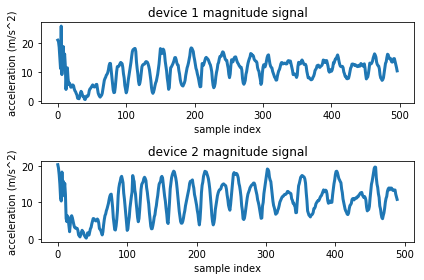

In [69]:
fig, ax = plt.subplots(2,1)
ax[0].plot(df_datasets['acceleration_norm'].iloc[0][0])
ax[0].set_title('device 1 magnitude signal')
ax[0].set_xlabel('sample index')
ax[0].set_ylabel('acceleration (m/s^2)')

ax[1].plot(df_datasets['acceleration_norm'].iloc[0][1])
ax[1].set_title('device 2 magnitude signal')
ax[1].set_xlabel('sample index')
ax[1].set_ylabel('acceleration (m/s^2)')
fig.tight_layout()

## Feature Extraction (FeX) From Accelerometer Time Series

In this work, $10$ different features were used: number of peaks, root-mean-square (rms), mean, variance, skewness, kurtosis, crest factor, peak to peak, autocorrelation and average power. These features are extracted from the whole acceleration signal without doing any windowing. Since the ranges of feature values are quite different, feature values are normalized before the feature signal is passed to the quantizer.

In [10]:
def FeX(acc_signal, min_peak_distance, min_peak_height, peak_threshold):
    """Data descriptive statistics -- summary statistics"""
    crest_factor = lambda sig: 0.5 * (max(sig) - min(sig))/(np.sqrt(np.mean(sig**2)))
    
    pks_acc_signal,_ =  signal.find_peaks(acc_signal, 
                                        height=min_peak_height, 
                                        threshold=peak_threshold, 
                                        distance=min_peak_distance+0.0000001)
    
    rms_acc_signal = np.sqrt(np.mean(acc_signal**2))
    mean_acc_signal = np.mean(acc_signal)
    var_acc_signal = np.var(acc_signal, ddof=1)
    skewness_acc_signal = skew(acc_signal)
    kurtosis_acc_signal = kurtosis(acc_signal) + 3 # python kurtosis fct subtracts 3, therefore 3 is added
    cf_acc_signal = crest_factor(acc_signal)
    p2p_acc_signal = max(acc_signal) - min(acc_signal)
    autocorr_acc_signal = np.correlate(acc_signal, acc_signal)[0]
    pband_acc_signal = np.linalg.norm(acc_signal)**2/len(acc_signal)
    
    feature_acc_signal = [len(pks_acc_signal), rms_acc_signal, mean_acc_signal, var_acc_signal, skewness_acc_signal, 
                          kurtosis_acc_signal, cf_acc_signal, p2p_acc_signal, autocorr_acc_signal, pband_acc_signal]

    feature_acc_signal = np.asarray(feature_acc_signal)
    
    return feature_acc_signal

In [11]:
df_datasets['acceleration_feature'] = df_datasets['acceleration_norm'].apply(
    lambda row: tuple(FeX(elem, 3, 0, peak_threshold_raw) / normalizer_vector for elem in row) )

In [12]:
feature_filtered_acc_signal1 = np.full((nsignals, nfeatures, len(kernel_size)), np.inf)
feature_filtered_acc_signal2 = np.full((nsignals, nfeatures, len(kernel_size)), np.inf)

for idx_ks, ks in enumerate(kernel_size):
    
    lp_filter = 1/ks * np.ones(ks)
    
    df_filtered_acc =  df_datasets['acceleration_norm'].apply(
        lambda row: tuple(signal.lfilter(lp_filter, 1, elem) for elem in row) )
    
    feature_filtered_acc_signal1[:, :, idx_ks] = np.stack(df_filtered_acc.apply(
        lambda row: FeX(row[0], 3, 0, peak_threshold_filtered) / normalizer_vector).values, axis=0)
    
    feature_filtered_acc_signal2[:, :, idx_ks] = np.stack(df_filtered_acc.apply(
        lambda row: FeX(row[1], 3, 0, peak_threshold_filtered) / normalizer_vector).values, axis=0)
        
    print("ks: %d/%d " %(idx_ks+1, len(kernel_size)) )

#df_datasets['acceleration1_filtered_feature'] = feature_filtered_acc_signal1
#df_datasets['acceleration2_filtered_feature'] = feature_filtered_acc_signal2

/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


ks: 1/10 
ks: 2/10 
ks: 3/10 
ks: 4/10 
ks: 5/10 
ks: 6/10 
ks: 7/10 
ks: 8/10 
ks: 9/10 
ks: 10/10 


## Key Generation

* The ultimate objective is to generate exactly the same key from shared shaking processes independently without exchanging any acceleration signal content. Moreover, we want our algorithm to generate different keys on devices when they are not shaken together.

* It is known that although the both signals are similar, they are not identical. As a consequence, similar raw signals result in similar feature signals. However, we want our key generation algorithm to map similar feature signals to exactly same key which requires a hashing process. This could be realized via a quantizer which can also be interpreted as a classifier. 

* Before the normalized feature signal is passed to quantizer, it is rescaled according to number of bits used in the binary representation of the key. The canonical conversion from decimal to binary is adopted for mapping. At the end of quantization and binary representation, a bit stream of a certain length will be generated based on the number of features and number of bits used in binary representation. 
*  It is worth to notice  that  this  quantization  method  is  very  simple  to implement and calculate.

In [13]:
def generate_key(feature_signal, nbits):
    """generates information signal (key) from a given feature signal using Q(.) with nbits"""
    
    scaled_feature_signal = feature_signal/max(abs(feature_signal))
    scaled_feature_signal = np.round(2**(nbits-1) * (scaled_feature_signal + 1))
    bitstream = [format(feat, 'b').zfill(nbits+1) for feat in scaled_feature_signal.astype(int)]
    information_signal = ''.join(bitstream)
    return information_signal

In [14]:
def compute_metrics(gt, pred):
    conf_mat = confusion_matrix(y_true=gt, y_pred=pred, labels=[True, False])
    accuracy = accuracy_score(gt, pred)
    precision = precision_score(gt, pred)
    recall = recall_score(gt, pred, labels=[True, False])
    f1 = f1_score(gt, pred)
    
    metric = {'conf_mat': conf_mat, 
              'accuracy': accuracy, 
              'precision': precision, 
              'recall': recall, 
              'f1': f1}
    return metric

In [15]:
for idx_nb, nbit in enumerate(nbits):
    
    df_datasets['key_raw_descstat'] = df_datasets['acceleration_feature'].apply(
        lambda row: tuple(generate_key(elem, nbit) for elem in row))
    
    is_confirmed[:, 0] = df_datasets['key_raw_descstat'].apply(
        lambda row: sum([b1 == b2 for (b1,b2) in zip(row[0], row[1])])).values  
    
    for idx_ks, ks in enumerate(kernel_size):
        
       
        key1_filtered_descstat = []
        key2_filtered_descstat = []
        
        for idx_signal in range(nsignals):

            key1_filtered_descstat.append(generate_key(feature_filtered_acc_signal1[idx_signal, :, idx_ks], nbit))
            key2_filtered_descstat.append(generate_key(feature_filtered_acc_signal2[idx_signal, :, idx_ks], nbit))
            
            is_confirmed[idx_signal, 1] = sum([b1 == b2 for (b1,b2) in zip(key1_filtered_descstat[idx_signal], 
                                                                           key2_filtered_descstat[idx_signal])])
    
        # Performance Assessment (Confusion Matrix (filtered))
        y_pred_strict = is_confirmed[:, 1] == (nbit+1) * nfeatures
        metrics_filtered_strict = compute_metrics(labels.astype(bool), y_pred_strict)  
        df_metric = df_metric.append({'preprocessing': 'filtered', 
                                      'criteria': 'strict', 
                                      'nbit': nbit+1, 
                                      'kernel_size': ks,
                                      'conf_mat': metrics_filtered_strict['conf_mat'], 
                                      'accuracy': metrics_filtered_strict['accuracy'],
                                      'precision': metrics_filtered_strict['precision'],
                                      'recall': metrics_filtered_strict['recall'], 
                                      'f1': metrics_filtered_strict['f1']}, ignore_index=True)


        y_pred_relaxed = is_confirmed[:, 1] >= ((nbit+1)*nfeatures - (0.1 * (nbit+1)*nfeatures))
        metrics_filtered_relaxed = compute_metrics(labels.astype(bool), y_pred_relaxed)
        df_metric = df_metric.append({'preprocessing': 'filtered', 
                                      'criteria': 'relaxed', 
                                      'nbit': nbit+1, 
                                      'kernel_size': ks,
                                      'conf_mat': metrics_filtered_relaxed['conf_mat'], 
                                      'accuracy': metrics_filtered_relaxed['accuracy'],
                                      'precision': metrics_filtered_relaxed['precision'],
                                      'recall': metrics_filtered_relaxed['recall'], 
                                      'f1': metrics_filtered_relaxed['f1']}, ignore_index=True)
        
        print("nb:%d/%d ks:%d/%d" %(idx_nb+1, len(nbits), idx_ks+1, len(kernel_size)))
    
    # Performance Assessment (Confusion Matrix (raw))
    y_pred_strict = is_confirmed[:, 0] == (nbit+1)*nfeatures
    metrics_raw_strict = compute_metrics(labels.astype(bool), y_pred_strict)
    df_metric = df_metric.append({'preprocessing': 'raw', 
                                  'criteria': 'strict', 
                                  'nbit': nbit+1, 
                                  'conf_mat': metrics_raw_strict['conf_mat'], 
                                  'accuracy': metrics_raw_strict['accuracy'],
                                  'precision': metrics_raw_strict['precision'],
                                  'recall': metrics_raw_strict['recall'], 
                                  'f1': metrics_raw_strict['f1']}, ignore_index=True)

    y_pred_relaxed = is_confirmed[:, 0] >= (nbit+1)*nfeatures - 0.1 * (nbit+1)*nfeatures
    metrics_raw_relaxed = compute_metrics(labels.astype(bool), y_pred_relaxed)
    df_metric = df_metric.append({'preprocessing': 'raw', 
                                  'criteria': 'relaxed', 
                                  'nbit': nbit+1, 
                                  'conf_mat': metrics_raw_relaxed['conf_mat'], 
                                  'accuracy': metrics_raw_relaxed['accuracy'],
                                  'precision': metrics_raw_relaxed['precision'],
                                  'recall': metrics_raw_relaxed['recall'], 
                                  'f1': metrics_raw_relaxed['f1']}, ignore_index=True)


nb:1/5 ks:1/10
nb:1/5 ks:2/10
nb:1/5 ks:3/10
nb:1/5 ks:4/10
nb:1/5 ks:5/10
nb:1/5 ks:6/10
nb:1/5 ks:7/10
nb:1/5 ks:8/10
nb:1/5 ks:9/10
nb:1/5 ks:10/10
nb:2/5 ks:1/10
nb:2/5 ks:2/10
nb:2/5 ks:3/10
nb:2/5 ks:4/10
nb:2/5 ks:5/10
nb:2/5 ks:6/10
nb:2/5 ks:7/10
nb:2/5 ks:8/10
nb:2/5 ks:9/10
nb:2/5 ks:10/10
nb:3/5 ks:1/10
nb:3/5 ks:2/10
nb:3/5 ks:3/10
nb:3/5 ks:4/10
nb:3/5 ks:5/10
nb:3/5 ks:6/10
nb:3/5 ks:7/10
nb:3/5 ks:8/10
nb:3/5 ks:9/10
nb:3/5 ks:10/10
nb:4/5 ks:1/10
nb:4/5 ks:2/10


/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hidiryuzuguzel/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


nb:4/5 ks:3/10
nb:4/5 ks:4/10
nb:4/5 ks:5/10
nb:4/5 ks:6/10
nb:4/5 ks:7/10
nb:4/5 ks:8/10
nb:4/5 ks:9/10
nb:4/5 ks:10/10
nb:5/5 ks:1/10
nb:5/5 ks:2/10
nb:5/5 ks:3/10
nb:5/5 ks:4/10
nb:5/5 ks:5/10
nb:5/5 ks:6/10
nb:5/5 ks:7/10
nb:5/5 ks:8/10
nb:5/5 ks:9/10
nb:5/5 ks:10/10


## Performance Assessment Summary 

- hard constraint (100% matches are required)
- relaxed conditions (90% matches are enough)

In [16]:
idx_best_accuracy = df_metric.groupby(['preprocessing', 'criteria'])['accuracy'].transform(max) == df_metric['accuracy']
df_metric[idx_best_accuracy]

,preprocessing,criteria,nbit,kernel_size,conf_mat,accuracy,precision,recall,f1
1,filtered,relaxed,4,5,"[[114, 36], [13, 287]]",0.891111,0.897638,0.760000,0.823105
8,filtered,strict,4,25,"[[64, 86], [6, 294]]",0.795556,0.914286,0.426667,0.581818
20,raw,strict,4,NaN,"[[46, 104], [0, 300]]",0.768889,1.000000,0.306667,0.469388
21,raw,relaxed,4,NaN,"[[99, 51], [21, 279]]",0.840000,0.825000,0.660000,0.733333


In [17]:
idx_best_f1 = df_metric.groupby(['preprocessing', 'criteria'])['f1'].transform(max) == df_metric['f1']
df_metric[idx_best_f1]

,preprocessing,criteria,nbit,kernel_size,conf_mat,accuracy,precision,recall,f1
1,filtered,relaxed,4,5,"[[114, 36], [13, 287]]",0.891111,0.897638,0.760000,0.823105
18,filtered,strict,4,50,"[[68, 82], [11, 289]]",0.793333,0.860759,0.453333,0.593886
20,raw,strict,4,NaN,"[[46, 104], [0, 300]]",0.768889,1.000000,0.306667,0.469388
21,raw,relaxed,4,NaN,"[[99, 51], [21, 279]]",0.840000,0.825000,0.660000,0.733333


In [18]:
df_filt_strict = df_metric[(df_metric['preprocessing'] == 'filtered') & (df_metric['criteria'] == 'strict')]
accuracy_filt_strict = pd.pivot_table(df_filt_strict, values='accuracy', index='nbit', columns='kernel_size').values
f1_filt_strict = pd.pivot_table(df_filt_strict, values='f1', index='nbit', columns='kernel_size').values

In [19]:
df_filt_relaxed = df_metric[(df_metric['preprocessing'] == 'filtered') & (df_metric['criteria'] == 'relaxed')]
accuracy_filt_relaxed = pd.pivot_table(df_filt_relaxed, values='accuracy', index='nbit', columns='kernel_size').values
f1_filt_relaxed = pd.pivot_table(df_filt_relaxed, values='f1', index='nbit', columns='kernel_size').values

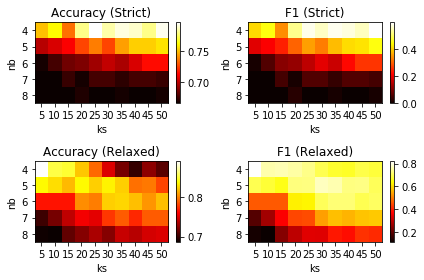

In [20]:
metrics = {}
metrics['Accuracy (Strict)'] = accuracy_filt_strict
metrics['F1 (Strict)'] = f1_filt_strict
metrics['Accuracy (Relaxed)'] = accuracy_filt_relaxed
metrics['F1 (Relaxed)'] = f1_filt_relaxed

fig, axes = plt.subplots(2,2)

for ax, key in zip(axes.flatten(), metrics):

    im = ax.imshow(metrics[key], aspect= 'auto', cmap="hot")
    ax.set_xlabel('ks')
    ax.set_ylabel('nb')
    ax.set_title(key)
    ax.set_xticks(range(0, len(kernel_size)))
    ax.set_yticks(range(0, len(nbits)))
    ax.set_xticklabels(kernel_size)
    ax.set_yticklabels(nbits + 1)
    fig.colorbar(im, ax=ax)
    fig.tight_layout()

## Entropy Analysis

- Generate keys with best parameters, i.e. nb= 4 bits & kernel_size = 5
- For the above four cases (strict/relaxed, raw/filtered) we also estimated the entropies of the information signals. The maximal possible entropy is of course $40$ bits when each of the $10$ feature signals are quantized to $nb=4$ four bits and then concatenated to one bitstream of length $40$. The needed probabilities were obtained by estimating a multivariate Bernoulli mixture with the expectation maximization algorithm from our keys. The Bayesian information criterion was used to determine the size of the mixture. The hereby calculated entropies varied between $14$-$16$ bits for the four cases, which is sufficiently strong security for typical device pairing applications.

In [21]:
df_datasets['key_raw_descstat'] = df_datasets['acceleration_feature'].apply(
    lambda row: tuple(generate_key(elem, 3) for elem in row))

In [22]:
idx_best_ks = np.where(kernel_size==5)[0][0]
df_datasets['filtered_acceleration_feature'] = [(f1,f2) for f1,f2 in zip(feature_filtered_acc_signal1[:,:,idx_best_ks], 
                                                                     feature_filtered_acc_signal2[:,:,idx_best_ks])]

df_datasets['key_filtered_descstat'] = df_datasets['filtered_acceleration_feature'].apply(
    lambda row: tuple(generate_key(elem, 3) for elem in row))

In [23]:
A = []
for idx_signal, row in df_datasets.iterrows():
    A.append(list(map(int, row['key_raw_descstat'][0])))
    
A = np.asarray(A[:150])
print(A)

[[1 0 0 ... 1 0 1]
 [0 1 1 ... 1 0 1]
 [0 1 1 ... 1 0 1]
 ...
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 0 0 0]]


In [25]:
vA = np.var(A, axis=0, ddof=1)
vA

array([0.22590604, 0.        , 0.        , 0.23194631, 0.        ,
       0.16505593, 0.        , 0.03243848, 0.        , 0.12599553,
       0.22590604, 0.        , 0.        , 0.23194631, 0.01973154,
       0.16505593, 0.        , 0.03243848, 0.        , 0.12599553,
       0.22590604, 0.25149888, 0.22590604, 0.24881432, 0.01973154,
       0.19369128, 0.00666667, 0.05082774, 0.20868009, 0.2190604 ,
       0.20295302, 0.25163311, 0.23002237, 0.23718121, 0.20295302,
       0.23718121, 0.10630872, 0.25163311, 0.23002237, 0.24881432])

In [26]:
A = A[:, vA>0]
A

array([[1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [27]:
N, D = np.shape(A)

In [28]:
N,D

(150, 31)

## EM estimation of the density

In [44]:
C_range = np.arange(1, 31) # hyperparameter: number of mixture components 
MAX_ITER = 20

BICmtx = np.zeros((len(C_range), MAX_ITER))
Hmtx = BICmtx.copy()

In [45]:
for idx, C in enumerate(C_range):
    for it in range(MAX_ITER):
        p = 1/C * np.ones((C,1)) + np.random.randn(C,1)*(0.2*1/C) # initialization of mixing parameters
        q = 1/2 * np.ones((C,D)) + np.random.randn(C,D)*(0.2*1/2) # initialization of Bernoulli parameters
        k = A.copy()  # data
        f = lambda k, q_c: np.prod(np.power(np.tile(q_c, (N, 1)), k) * np.power(1-np.tile(q_c, (N, 1)), 1-k), dtype='float64', axis=1)
        p0 = p.copy()
        pn = 1
        q0 = q.copy()
        qn = 1
        while (pn > 1e-8 or qn > 1e-8):
            sumC = 0
            
            for i in range(C):
                sumC += p[i] * f(k, q[i,:])
            
            for i in range(C):
                gnk = sum((p[i] * f(k, q[i, :])) / sumC)
                gnkx = sum(np.tile(((p[i] * f(k, q[i, :]) / sumC))[..., np.newaxis], (1, D)) * k)
                p[i] = 1/N * gnk
                q[i, :] = gnkx/gnk
                
            pn = np.median(abs(p-p0) / np.maximum(abs(p), 1e-10))
            qn = np.median(abs(q.flatten()-q0.flatten()) / np.maximum(abs(q.flatten()), 1e-10))
            p0 = p
            q0 = q
            
        # Entropy calculation:
        
        sumC = 0
        for i in range(C):
            sumC += p[i] * f(k, q[i,:])
        
        Hmtx[idx, it] = -sum(np.log2(sumC))
        Hmtx[idx, it] /= N
        
        # BIC calculation:
        
        loglik = sum(np.log(sumC))
        BICmtx[idx, it] = -2 * loglik + (C+C*D) * np.log(N)


BIC = np.median(BICmtx, axis=1)
H = np.median(Hmtx, axis=1)
indexi = np.argmin(BIC)
Entropy = H[indexi]
print("Entropy: ", Entropy)

Entropy:  17.488822561687364


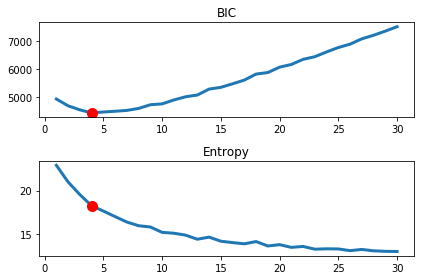

In [31]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(C_range,BIC, C_range[indexi], BIC[indexi], 'ro')
ax[0].set_title("BIC")

ax[1].plot(C_range, H, C_range[indexi], H[indexi], 'ro')
ax[1].set_title("Entropy")

plt.tight_layout()

plt.show()